In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [2]:
# 0 = Normal
# 1 = Aceitável
# 2 = Crítico

base = pd.read_csv('training.csv', sep = ',')

In [3]:
base.head()

,temperatura,umidade,smoke,gas_co,estado
0,23,41,312,333,0
1,21,34,264,411,1
2,22,62,185,344,1
3,26,38,486,320,2
4,24,72,2100,622,2


In [4]:
temperatura = ctrl.Antecedent(np.arange(16, 30, 0.5), 'temperatura')
umidade = ctrl.Antecedent(np.arange(20, 90, 1), 'umidade')
smoke = ctrl.Antecedent(np.arange(200, 1000, 1), 'smoke')
gas_co = ctrl.Antecedent(np.arange(200, 1000, 1), 'gas_co')
out = ctrl.Consequent(np.arange(0, 6, 0.1), 'out')

# Casos de Teste para Temperatura

In [5]:
# valores-padrão
# temp_aceit <= 20
# temp_norm_min = 22
# temp_norm_max = 24
# temp_critic >= 26
def testa_temperatura(aceitavel, norm_min, norm_max, critico):
    temp_aceit = aceitavel
    temp_norm_min = norm_min
    temp_norm_max = norm_max
    temp_critic = critico

    flag = False

    while(flag is False):
        if((temp_aceit < temp_norm_min) & (temp_norm_min < temp_norm_max) & (temp_norm_max < temp_critic)):
            temperatura['normal'] = fuzzy.trapmf(temperatura.universe, [temp_aceit, temp_norm_min, temp_norm_max, temp_critic])
            temperatura['aceitavel'] = fuzzy.trapmf(temperatura.universe, [-1, 0, temp_aceit, temp_norm_min])
            temperatura['critico'] = fuzzy.trapmf(temperatura.universe, [temp_norm_max, temp_critic, 96, 100])
            flag = True

        # tratamento de possíveis erros
        else:
            if(temp_norm_max > temp_norm_min) == False:
                print("\nTemperatura Normal Máxima deve ser maior que Temperatura Normal Minima.")
                print("Valores selecionados para Temperatura:")
                print("Temperatura Normal: {normal_minimo} - {normal_maximo}\n".format(normal_minimo = temp_norm_min, normal_maximo = temp_norm_max))
                temp_norm_min = int(input("Digite o valor mínimo para Temperatura Normal:"))
                temp_norm_max = int(input("Digite o valor máximo para Temperatura Normal:"))

            if(temp_critic > temp_norm_max) == False:
                print("\nTemperatura Crítica Mínima deve ser maior que Temperatura Normal Máxima.")
                print("Valores selecionados para Temperatura:")
                print("Temperatura Normal: {normal_minimo} - {normal_maximo} \
                     \nTemperatura Crítica >= {critica}\n".format(normal_minimo = temp_norm_min, normal_maximo = temp_norm_max, critica = temp_critic))
                temp_critic = int(input("Digite o valor mínimo para Temperatura Crítica:"))

            if(temp_aceit < temp_norm_min) == False:
                print("\nTemperatura Aceitável Máxima deve ser menor que Temperatura Normal Mínima.")
                print("Valores selecionados para Temperatura:")
                print("Temperatura Aceitável <= {aceitavel} \
                     \nTemperatura Normal: {normal_minimo} - {normal_maximo}\n".format(aceitavel = temp_aceit, normal_minimo = temp_norm_min, normal_maximo = temp_norm_max))
                temp_aceit = int(input("Digite o valor máximo para Temperatura Aceitável:"))

    print("Temperatura Aceitável <= {aceitavel} \
         \nTemperatura Normal: {normal_minimo} - {normal_maximo} \
         \nTemperatura Crítica >= {critica}\n".format(aceitavel = temp_aceit, normal_minimo = temp_norm_min, normal_maximo = temp_norm_max, critica = temp_critic))

    temperatura.view()

# Caso de Teste 1: Temperatura Aceitável < Temperatura Normal < Temperatura Crítica

Temperatura Aceitável <= 20          
Temperatura Normal: 22 - 24          
Temperatura Crítica >= 26



C:\Users\Alyson\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


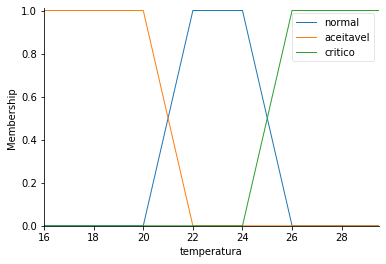

In [6]:
temp_aceitavel = 20
temp_normal_minimo = 22
temp_normal_maximo = 24
temp_critico = 26

testa_temperatura(temp_aceitavel, temp_normal_minimo, temp_normal_maximo, temp_critico)

# Caso de Teste 2: Temperatura Crítica < Temperatura Normal < Temperatura Aceitável


Temperatura Crítica Mínima deve ser maior que Temperatura Normal Máxima.
Valores selecionados para Temperatura:
Temperatura Normal: 22 - 24                      
Temperatura Crítica >= 20



Digite o valor mínimo para Temperatura Crítica: 25



Temperatura Aceitável Máxima deve ser menor que Temperatura Normal Mínima.
Valores selecionados para Temperatura:
Temperatura Aceitável <= 26                      
Temperatura Normal: 22 - 24



Digite o valor máximo para Temperatura Aceitável: 21


Temperatura Aceitável <= 21          
Temperatura Normal: 22 - 24          
Temperatura Crítica >= 25



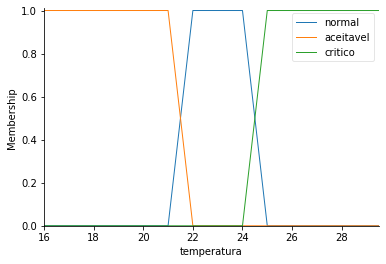

In [7]:
temp_aceitavel = 26
temp_normal_minimo = 22
temp_normal_maximo = 24
temp_critico = 20

testa_temperatura(temp_aceitavel, temp_normal_minimo, temp_normal_maximo, temp_critico)

# Caso de Teste 3: Temperatura Normal Máxima < Temperatura Normal Mínima


Temperatura Normal Máxima deve ser maior que Temperatura Normal Minima.
Valores selecionados para Temperatura:
Temperatura Normal: 24 - 22



Digite o valor mínimo para Temperatura Normal: 20
Digite o valor máximo para Temperatura Normal: 23



Temperatura Crítica Mínima deve ser maior que Temperatura Normal Máxima.
Valores selecionados para Temperatura:
Temperatura Normal: 20 - 23                      
Temperatura Crítica >= 20



Digite o valor mínimo para Temperatura Crítica: 24



Temperatura Aceitável Máxima deve ser menor que Temperatura Normal Mínima.
Valores selecionados para Temperatura:
Temperatura Aceitável <= 26                      
Temperatura Normal: 20 - 23



Digite o valor máximo para Temperatura Aceitável: 19


Temperatura Aceitável <= 19          
Temperatura Normal: 20 - 23          
Temperatura Crítica >= 24



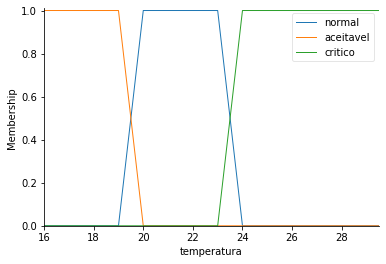

In [8]:
temp_aceitavel = 26
temp_normal_minimo = 24
temp_normal_maximo = 22
temp_critico = 20

testa_temperatura(temp_aceitavel, temp_normal_minimo, temp_normal_maximo, temp_critico)

# Caso de Teste 4: Temperatura Crítica Dentro do intervalo de valores da Temperatura Normal


Temperatura Crítica Mínima deve ser maior que Temperatura Normal Máxima.
Valores selecionados para Temperatura:
Temperatura Normal: 22 - 26                      
Temperatura Crítica >= 24



Digite o valor mínimo para Temperatura Crítica: 27


Temperatura Aceitável <= 20          
Temperatura Normal: 22 - 26          
Temperatura Crítica >= 27



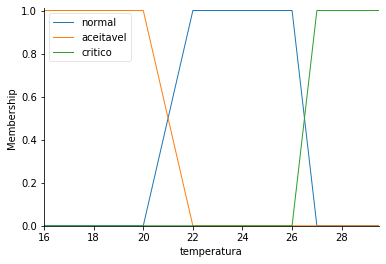

In [9]:
temp_aceitavel = 20
temp_normal_minimo = 22
temp_normal_maximo = 26
temp_critico = 24

testa_temperatura(temp_aceitavel, temp_normal_minimo, temp_normal_maximo, temp_critico)

# Casos de Teste para Umidade

In [10]:
# valores-padrão
# umid_norm <= 40
# umid_aceit_min = 50
# umid_aceit_max = 60
# umid_critic >= 70

def testa_umidade(normal, aceitavel_minimo, aceitavel_maximo, critico):
    umid_norm = normal
    umid_aceit_min = aceitavel_minimo
    umid_aceit_max = aceitavel_maximo
    umid_critic = critico

    flag = False

    while(flag is False):
        if((umid_norm < umid_aceit_min) & (umid_aceit_min < umid_aceit_max) & (umid_aceit_max < umid_critic)):
            umidade['normal'] = fuzzy.trapmf(umidade.universe, [-1, 0, umid_norm, umid_aceit_min])
            umidade['aceitavel'] = fuzzy.trapmf(umidade.universe, [umid_norm, umid_aceit_min, umid_aceit_max, umid_critic])
            umidade['critico'] = fuzzy.trapmf(umidade.universe, [umid_aceit_max, umid_critic, 96, 100])
            flag = True

        # tratamento de possíveis erros
        else:
            if(umid_aceit_max > umid_aceit_min) == False:
                print("\nUmidade Aceitável Máxima deve ser maior que Umidade Aceitável Minima.")
                print("Valores selecionados para Umidade:")
                print("Umidade Aceitável: {aceitavel_minimo} - {aceitavel_maximo}\n".format(aceitavel_minimo = umid_aceit_min, aceitavel_maximo = umid_aceit_max))
                umid_aceit_min = int(input("Digite o valor mínimo para Umidade Aceitável:"))
                umid_aceit_max = int(input("Digite o valor máximo para Umidade Aceitável:"))

            if(umid_critic > umid_aceit_max) == False:
                print("\nUmidade Crítica Mínima deve ser maior que Umidade Aceitável Máxima.")
                print("Valores selecionados para Umidade:")
                print("Umidade Aceitável: {aceitavel_minimo} - {aceitavel_maximo} \
                     \nUmidade Crítica >= {critica}\n".format(aceitavel_minimo = umid_aceit_min, aceitavel_maximo = umid_aceit_max, critica = umid_critic))
                umid_critic = int(input("Digite o valor mínimo para Umidade Crítica:"))

            if(umid_norm < umid_aceit_min) == False:
                print("\nUmidade Normal Máxima deve ser menor que Umidade Aceitável Mínima.")
                print("Valores selecionados para Umidade:")
                print("Umidade Normal <= {normal} \
                     \nUmidade Aceitável: {aceitavel_minimo} - {aceitavel_maximo}\n".format(normal = umid_norm, aceitavel_minimo = umid_aceit_min, aceitavel_maximo = umid_aceit_max))
                umid_norm = int(input("Digite o valor máximo para Umidade Normal:"))

    print("Umidade Normal <= {normal} \
         \nUmidade Aceitável: {aceitavel_minimo} - {aceitavel_maximo} \
         \nUmidade Crítica >= {critica}\n".format(normal = umid_norm, aceitavel_minimo = umid_aceit_min, aceitavel_maximo = umid_aceit_max, critica = umid_critic))

    umidade.view()

# Caso de Teste 5: Umidade Normal < Umidade Aceitavel < Umidade Crítica

Umidade Normal <= 40          
Umidade Aceitável: 50 - 60          
Umidade Crítica >= 70



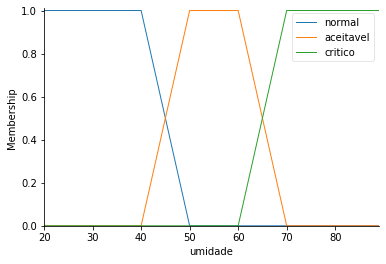

In [11]:
normal = 40
aceitavel_minimo = 50
aceitavel_maximo = 60
critico = 70

testa_umidade(normal, aceitavel_minimo, aceitavel_maximo, critico)

# Caso de Teste 6: Umidade Crítica < Umidade Aceitavel < Umidade Normal


Umidade Crítica Mínima deve ser maior que Umidade Aceitável Máxima.
Valores selecionados para Umidade:
Umidade Aceitável: 50 - 60                      
Umidade Crítica >= 45



Digite o valor mínimo para Umidade Crítica: 64



Umidade Normal Máxima deve ser menor que Umidade Aceitável Mínima.
Valores selecionados para Umidade:
Umidade Normal <= 65                      
Umidade Aceitável: 50 - 60



Digite o valor máximo para Umidade Normal: 45


Umidade Normal <= 45          
Umidade Aceitável: 50 - 60          
Umidade Crítica >= 64



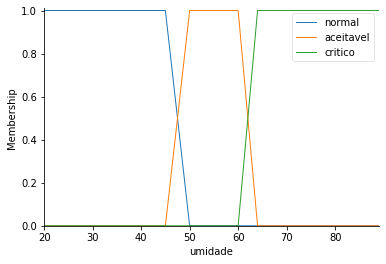

In [12]:
normal = 65
aceitavel_minimo = 50
aceitavel_maximo = 60
critico = 45

testa_umidade(normal, aceitavel_minimo, aceitavel_maximo, critico)

# Caso de Teste 7: Umidade Aceitável Máxima < Umidade Aceitável Mínima


Umidade Aceitável Máxima deve ser maior que Umidade Aceitável Minima.
Valores selecionados para Umidade:
Umidade Aceitável: 50 - 45



Digite o valor mínimo para Umidade Aceitável: 45
Digite o valor máximo para Umidade Aceitável: 65


Umidade Normal <= 40          
Umidade Aceitável: 45 - 65          
Umidade Crítica >= 70



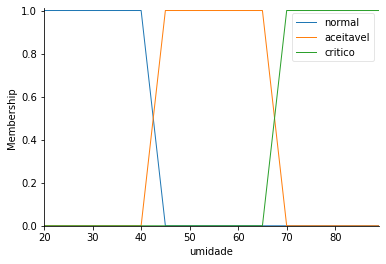

In [13]:
normal = 40
aceitavel_minimo = 50
aceitavel_maximo = 45
critico = 70

testa_umidade(normal, aceitavel_minimo, aceitavel_maximo, critico)

# Caso de Teste 8: Umidade Normal dentro do intervalo de valores da Umidade Aceitável


Umidade Normal Máxima deve ser menor que Umidade Aceitável Mínima.
Valores selecionados para Umidade:
Umidade Normal <= 55                      
Umidade Aceitável: 50 - 60



Digite o valor máximo para Umidade Normal: 49


Umidade Normal <= 49          
Umidade Aceitável: 50 - 60          
Umidade Crítica >= 70



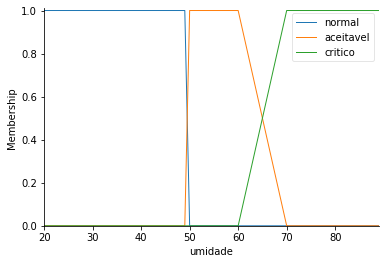

In [14]:
normal = 55
aceitavel_minimo = 50
aceitavel_maximo = 60
critico = 70

testa_umidade(normal, aceitavel_minimo, aceitavel_maximo, critico)

# Caso de Teste 9: Umidade Aceitavel < Umidade Crítica < Umidade Normal


Umidade Normal Máxima deve ser menor que Umidade Aceitável Mínima.
Valores selecionados para Umidade:
Umidade Normal <= 75                      
Umidade Aceitável: 50 - 60



Digite o valor máximo para Umidade Normal: 45


Umidade Normal <= 45          
Umidade Aceitável: 50 - 60          
Umidade Crítica >= 70



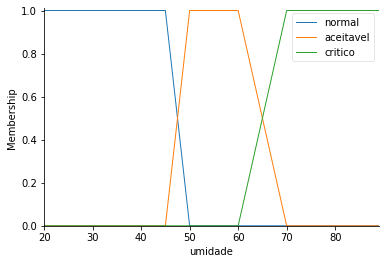

In [15]:
normal = 75
aceitavel_minimo = 50
aceitavel_maximo = 60
critico = 70

testa_umidade(normal, aceitavel_minimo, aceitavel_maximo, critico)

# Casos de Teste para Gás/Fumaça

In [27]:
# valores-padrão
# smoke_norm <= 400
# smoke_aceit_min = 500
# smoke_aceit_max = 600
# smoke_critic >= 700

def testa_smoke(normal, aceitavel_minimo, aceitavel_maximo, critico):
    smoke_norm = normal
    smoke_aceit_min = aceitavel_minimo
    smoke_aceit_max = aceitavel_maximo
    smoke_critic = critico

    flag = False

    while(flag is False):
        if((smoke_norm < smoke_aceit_min) & (smoke_aceit_min < smoke_aceit_max) & (smoke_aceit_max < smoke_critic)):
            smoke['normal'] = fuzzy.trapmf(smoke.universe, [-1, 0, smoke_norm, smoke_aceit_min])
            smoke['aceitavel'] = fuzzy.trapmf(smoke.universe, [smoke_norm, smoke_aceit_min, smoke_aceit_max, smoke_critic])
            smoke['critico'] = fuzzy.trapmf(smoke.universe, [smoke_aceit_max, smoke_critic, 900, 1100])
            flag = True

        # tratamento de possíveis erros
        else:
            if(smoke_aceit_max > smoke_aceit_min) == False:
                print("\nFumaça Aceitável Máxima deve ser maior que Fumaça Aceitável Minima.")
                print("Valores selecionados para Fumaça:")
                print("Fumaça Aceitável: {aceitavel_minimo} - {aceitavel_maximo}\n".format(aceitavel_minimo = smoke_aceit_min, aceitavel_maximo = smoke_aceit_max))
                smoke_aceit_min = int(input("Digite o valor mínimo para Fumaça Aceitável:"))
                smoke_aceit_max = int(input("Digite o valor máximo para Fumaça Aceitável:"))

            if(smoke_critic > smoke_aceit_max) == False:
                print("\nFumaça Crítica Mínima deve ser maior que Fumaça Aceitável Máxima.")
                print("Valores selecionados para Fumaça:")
                print("Fumaça Aceitável: {aceitavel_minimo} - {aceitavel_maximo} \
                     \nFumaça Crítica >= {critica}\n".format(aceitavel_minimo = smoke_aceit_min, aceitavel_maximo = smoke_aceit_max, critica = smoke_critic))
                smoke_critic = int(input("Digite o valor mínimo para Fumaça Crítica:"))

            if(smoke_norm < smoke_aceit_min) == False:
                print("\nFumaça Normal Máxima deve ser menor que Fumaça Aceitável Mínima.")
                print("Valores selecionados para Fumaça:")
                print("Fumaça Normal <= {normal} \
                     \nFumaça Aceitável: {aceitavel_minimo} - {aceitavel_maximo}\n".format(normal = smoke_norm, aceitavel_minimo = smoke_aceit_min, aceitavel_maximo = smoke_aceit_max))
                smoke_norm = int(input("Digite o valor máximo para Fumaça Normal:"))

    print("Fumaça Normal <= {normal} \
         \nFumaça Aceitável: {aceitavel_minimo} - {aceitavel_maximo} \
         \nFumaça Crítica >= {critica}\n".format(normal = smoke_norm, aceitavel_minimo = smoke_aceit_min, aceitavel_maximo = smoke_aceit_max, critica = smoke_critic))

    smoke.view()

# Caso de Teste 10: Fumaça Normal < Fumaça Aceitavel < Fumaça Crítica

Fumaça Normal <= 400          
Fumaça Aceitável: 500 - 600          
Fumaça Crítica >= 700



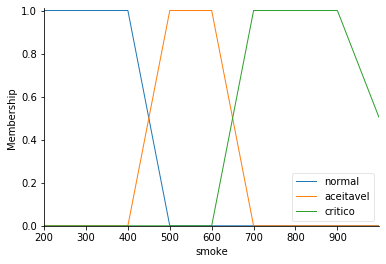

In [18]:
normal = 400
aceitavel_minimo = 500
aceitavel_maximo = 600
critico = 700

testa_smoke(normal, aceitavel_minimo, aceitavel_maximo, critico)

# Caso de Teste 11: Fumaça Aceitável Máxima < Fumaça Aceitável Mínima


Fumaça Aceitável Máxima deve ser maior que Fumaça Aceitável Minima.
Valores selecionados para Fumaça:
Fumaça Aceitável: 500 - 450



Digite o valor mínimo para Fumaça Aceitável: 450
Digite o valor máximo para Fumaça Aceitável: 650


Fumaça Normal <= 400          
Fumaça Aceitável: 450 - 650          
Fumaça Crítica >= 700



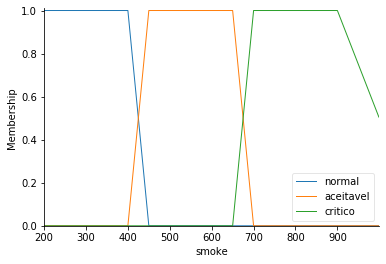

In [19]:
normal = 400
aceitavel_minimo = 500
aceitavel_maximo = 450
critico = 700

testa_smoke(normal, aceitavel_minimo, aceitavel_maximo, critico)

# Caso de Teste 12: Fumaça Crítica dentro do intervalo de valores da Fumaça Aceitável


Fumaça Crítica Mínima deve ser maior que Fumaça Aceitável Máxima.
Valores selecionados para Fumaça:
Fumaça Aceitável: 500 - 600                      
Fumaça Crítica >= 550



Digite o valor mínimo para Fumaça Crítica: 650


Fumaça Normal <= 400          
Fumaça Aceitável: 500 - 600          
Fumaça Crítica >= 650



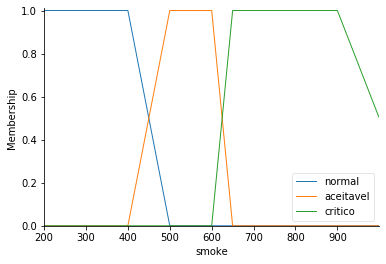

In [23]:
normal = 400
aceitavel_minimo = 500
aceitavel_maximo = 600
critico = 550

testa_smoke(normal, aceitavel_minimo, aceitavel_maximo, critico)

# Caso de Teste 13: Fumaça Aceitável < Fumaça Crítica < Fumaça Aceitável


Fumaça Normal Máxima deve ser menor que Fumaça Aceitável Mínima.
Valores selecionados para Fumaça:
Fumaça Normal <= 800                      
Fumaça Aceitável: 500 - 600



Digite o valor máximo para Fumaça Normal: 450


Fumaça Normal <= 450          
Fumaça Aceitável: 500 - 600          
Fumaça Crítica >= 700



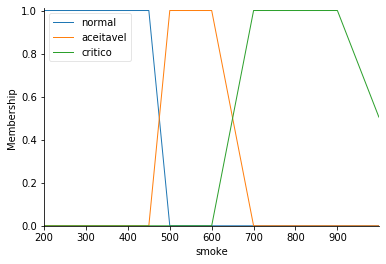

In [28]:
normal = 800
aceitavel_minimo = 500
aceitavel_maximo = 600
critico = 700

testa_smoke(normal, aceitavel_minimo, aceitavel_maximo, critico)